# Deep Learing

## Print the infomation of devices

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8570047531447952787
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 4713405780412046328
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 5730993890938815030
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_EXEC:0"
device_type: "XLA_EXEC"
memory_limit: 17179869184
locality {
}
incarnation: 14135111931052858300
physical_device_desc: "device: XLA_EXEC device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10967020340
locality {
  bus_id: 1
}
incarnation: 9337884649284283011
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:02:00.0, compute capability: 6.1"
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 10775324263
locality {
  bus_id: 1
}
incarnation: 12590006161560140051
physical_devic

## Assignment 1

In [2]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
import random 
import hashlib
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

In [3]:
url = 'https://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None
data_root = '.' # Change me to store data elsewhere

def download_progress_hook(count, blockSize, totalSize):
  """A hook to report the progress of a download. This is mostly intended for users with
  slow internet connections. Reports every 5% change in download progress.
  """
  global last_percent_reported
  percent = int(count * blockSize * 100 / totalSize)

  if last_percent_reported != percent:
    if percent % 5 == 0:
      sys.stdout.write("%s%%" % percent)
      sys.stdout.flush()
    else:
      sys.stdout.write(".")
      sys.stdout.flush()
      
    last_percent_reported = percent
        
def maybe_download(filename, expected_bytes, force=False):
  """Download a file if not present, and make sure it's the right size."""
  dest_filename = os.path.join(data_root, filename)
  if force or not os.path.exists(dest_filename):
    print('Attempting to download:', filename) 
    filename, _ = urlretrieve(url + filename, dest_filename, reporthook=download_progress_hook)
    print('\nDownload Complete!')
  statinfo = os.stat(dest_filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', dest_filename)
  else:
    raise Exception(
      'Failed to verify ' + dest_filename + '. Can you get to it with a browser?')
  return dest_filename

train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

Found and verified ./notMNIST_large.tar.gz
Found and verified ./notMNIST_small.tar.gz


In [4]:
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall(data_root)
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders

train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

./notMNIST_large already present - Skipping extraction of ./notMNIST_large.tar.gz.
['./notMNIST_large/A', './notMNIST_large/B', './notMNIST_large/C', './notMNIST_large/D', './notMNIST_large/E', './notMNIST_large/F', './notMNIST_large/G', './notMNIST_large/H', './notMNIST_large/I', './notMNIST_large/J']
./notMNIST_small already present - Skipping extraction of ./notMNIST_small.tar.gz.
['./notMNIST_small/A', './notMNIST_small/B', './notMNIST_small/C', './notMNIST_small/D', './notMNIST_small/E', './notMNIST_small/F', './notMNIST_small/G', './notMNIST_small/H', './notMNIST_small/I', './notMNIST_small/J']


## Problem 1

In [5]:
def display_samples(data_folder, sample_size):
    for folder in data_folder:
        print(folder)
        image_files = os.listdir(folder)
        image_sample = random.sample(image_files, sample_size)
        for image in image_sample:
            image_file = os.path.join(folder, image)
            i = Image(filename= image_file)
            display(i)

In [6]:
display_samples(train_folders, 1)

./notMNIST_large/A


./notMNIST_large/B


./notMNIST_large/C


./notMNIST_large/D


./notMNIST_large/E


./notMNIST_large/F


./notMNIST_large/G


./notMNIST_large/H


./notMNIST_large/I


./notMNIST_large/J


In [7]:
display_samples(test_folders, 1)

./notMNIST_small/A


./notMNIST_small/B


./notMNIST_small/C


./notMNIST_small/D


./notMNIST_small/E


./notMNIST_small/F


./notMNIST_small/G


./notMNIST_small/H


./notMNIST_small/I


./notMNIST_small/J


In [8]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = (ndimage.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:                
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
  dataset_names = []
  for folder in data_folders:
    set_filename = folder + '.pickle'
    dataset_names.append(set_filename)
    if os.path.exists(set_filename) and not force:
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s.' % set_filename)
      dataset = load_letter(folder, min_num_images_per_class)
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)
  
  return dataset_names

train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)

Pickling ./notMNIST_large/A.pickle.
./notMNIST_large/A
Could not read: ./notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png : cannot identify image file './notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png' - it's ok, skipping.
Could not read: ./notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png : cannot identify image file './notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png' - it's ok, skipping.
Could not read: ./notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png : cannot identify image file './notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png' - it's ok, skipping.
Full dataset tensor: (52909, 28, 28)
Mean: -0.12825
Standard deviation: 0.443121
Pickling ./notMNIST_large/B.pickle.
./notMNIST_large/B
Could not read: ./notMNIST_large/B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png : cannot identify image file './notMNIST_large/B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png' - it's ok, skipping.
Full dataset tensor: (52911, 28, 28)
Mean: -0.00756304
Standard deviation: 0.454491
Pickl

## Problem 2

In [9]:
def display_sample_pickles(data_folders):
    folder = random.sample(data_folders, 1)
    pickle_filename = ''.join(folder) + '.pickle'
    try:
        with open(pickle_filename, 'rb') as f:
            dataset = pickle.load(f)
    except Exception as e:
        print('Unable to read data from', pickle_filname, ':', e)
        return
    #plt.subtitle(''.join(folder)[-1])
    for i,img in enumerate(random.sample(list(dataset), 8)):
        plt.subplot(2, 4, i+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

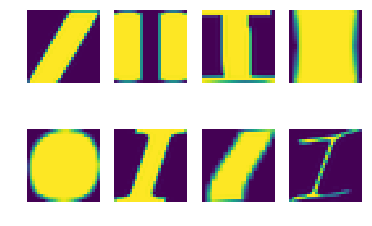

In [10]:
display_sample_pickles(train_folders)

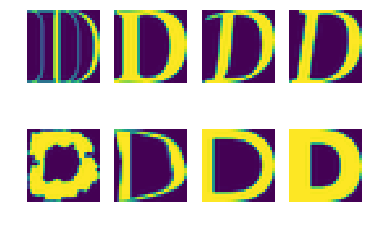

In [11]:
display_sample_pickles(test_folders)

## Problem 3

In [12]:
def make_arrays(nb_rows, img_size):
    if nb_rows:
        dataset = np.ndarray((nb_rows, img_size, img_size), dtype = np.float32)
        labels = np.ndarray(nb_rows, dtype = np.int32)
    else:
        dataset, labels = None, None
    return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size = 0):
    num_classes = len(pickle_files)
    valid_dataset, valid_labels = make_arrays(valid_size, image_size)
    train_dataset, train_labels = make_arrays(train_size, image_size)
    vsize_per_class = valid_size // num_classes 
    tsize_per_class = train_size // num_classes
    
    start_v, start_t = 0, 0
    end_v, end_t = vsize_per_class, tsize_per_class
    end_1 = vsize_per_class + tsize_per_class
    for label, pickle_file in enumerate(pickle_files):
        try:
            with open(pickle_file, 'rb') as f:
                letter_set = pickle.load(f)
                np.random.shuffle(letter_set)
                if valid_dataset is not None:
                    valid_letter = letter_set[:vsize_per_class, :, :]
                    valid_dataset[start_v:end_v, :, :] = valid_letter
                    valid_labels[start_v:end_v] = label
                    start_v += vsize_per_class
                    end_v += vsize_per_class
                
                train_letter = letter_set[vsize_per_class:end_1, :, :]
                train_dataset[start_t:end_t, :, :] = train_letter
                train_labels[start_t:end_t] = label
                start_t += tsize_per_class
                end_t += tsize_per_class
        except Exception as e:
            print('Unable to process data from', pickle_file, ':', e)
            raise
    
    return valid_dataset, valid_labels, train_dataset, train_labels


train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


In [ ]:
pickle_files = train_datasets
num_classes = len(pickle_files)
valid_dataset, valid_labels = make_arrays(valid_size, image_size)
train_dataset, train_labels = make_arrays(train_size, image_size)
vsize_per_class = valid_size // num_classes 
tsize_per_class = train_size // num_classes
    
start_v, start_t = 0, 0
end_v, end_t = vsize_per_class, tsize_per_class
end_1 = vsize_per_class + tsize_per_class

label = 0
pickle_file = pickle_files[0]
print(pickle_file)
with open(pickle_file, 'rb') as f:
    letter_set = pickle.load(f)
letter_set.keys()
    #np.random.shuffle(letter_set)

In [13]:
def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation, :, :]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

## Problem 4

In [15]:
pickle_file = os.path.join(data_root, 'notMNIST.pickle')

try:
    f = open(pickle_file, 'wb')
    save = {
        'train_dataset': train_dataset,
        'train_labels': train_labels,
        'valid_dataset': valid_dataset,
        'valid_labels': valid_labels,
        'test_dataset': test_dataset, 
        'test_labels': test_labels,
    }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e :
    print('Unable to save data to', pickle_file, ':', e)
    raise

In [16]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 690800503


## Proble 5

### Totally the same pictures

In [19]:
def extract_overlap(dataset_1, dataset_2):
    overlap = {}
    for i, img_1 in enumerate(dataset_1):
        for j, img_2 in enumerate(dataset_2):
            if np.array_equal(img_1, img_2):
                if not i in overlap.keys():
                    overlap[i] = []
                overlap[i].append(j)
    return overlap
%time overlap_test_train = extract_overlap(test_dataset[:200], train_dataset)

CPU times: user 2min 50s, sys: 0 ns, total: 2min 50s
Wall time: 2min 49s


In [ ]:
def display_overlap(overlap, source_dataset, target_dataset):
    item = random.choice(list(overlap.keys()))
    imgs = np.concatenate(([source_dataset[item]], target_dataset[overlap[item][0:7]]))
    plt.suptitle(item)
    for i, img in enumerate(imgs):
        plt.subplot(2, 4, i+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()
print('Number of overlaps:', len(overlap_test_train.keys()))
display_overlap(overlap_test_train, test_dataset[:200], train_dataset)

### Manhattan norm as distance of pictures

In [37]:
MAX_MANHATTAN_NORM = 10
def extract_overlap_near(dataset_1, dataset_2):
    overlap = {}
    for i, img_1 in enumerate(dataset_1):
        for j, img_2 in enumerate(dataset_2):
            diff = img_1 - img_2
            m_norm = np.sum(np.abs(diff))
            if m_norm < MAX_MANHATTAN_NORM:
                if not i in overlap.keys():
                    overlap[i] = []
                overlap[i].append(j)
    return overlap
%time overlap_test_train_near = extract_overlap_near(test_dataset[:200], train_dataset)

CPU times: user 5min 20s, sys: 260 ms, total: 5min 20s
Wall time: 5min 20s


Number of overlaps: 52


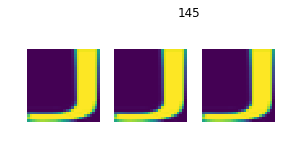

In [39]:
print('Number of overlaps:', len(overlap_test_train_near.keys()))
display_overlap(overlap_test_train_near, test_dataset[:200], train_dataset)

### Only extract one duplicate

In [46]:
def extract_overlap_stop(dataset_1, dataset_2):
    overlap = {}
    for i, img_1 in enumerate(dataset_1):
        for j, img_2 in enumerate(dataset_2):
            if np.array_equal(img_1, img_2):
                overlap[i] = [j]
                break
    return overlap
%time overlap_test_train = extract_overlap_stop(test_dataset[:200], train_dataset)

CPU times: user 2min 43s, sys: 808 ms, total: 2min 44s
Wall time: 2min 44s


Number of overlaps: 24


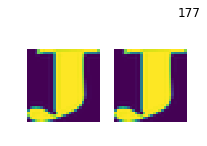

In [48]:
print('Number of overlaps:', len(overlap_test_train.keys()))
display_overlap(overlap_test_train, test_dataset[:200], train_dataset)

### Use attribute numpy.where

In [51]:
MAX_MANHATTAN_NORM = 10
def extract_overlap_where(dataset_1, dataset_2):
    overlap = {}
    for i, img_1 in enumerate(dataset_1):
        diff = dataset_2 - img_1
        norm = np.sum(np.abs(diff), axis = 1)
        duplicates = np.where(norm < MAX_MANHATTAN_NORM)
        if len(duplicates[0]):
            overlap[i] = duplicates[0]
    return overlap
test_flat = test_dataset.reshape(test_dataset.shape[0], 28*28)
train_flat = train_dataset.reshape(train_dataset.shape[0], 28*28)
%time overlap_test_train = extract_overlap_where(test_dataset[:200], train_dataset)

CPU times: user 1min 6s, sys: 20.1 s, total: 1min 26s
Wall time: 1min 26s


Number of overlaps: 200


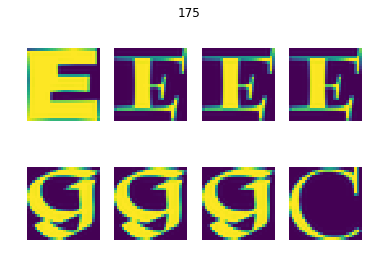

In [52]:
print('Number of overlaps:', len(overlap_test_train.keys()))
display_overlap(overlap_test_train, test_dataset[:200], train_dataset)

### Comparison using hash

In [61]:
def extract_overlap_hash(dataset_1, dataset_2):
    dataset_hash_1 = [hashlib.sha256(img).hexdigest() for img in dataset_1]
    dataset_hash_2 = [hashlib.sha256(img).hexdigest() for img in dataset_2]
    overlap = {}
    for i, hash_1 in enumerate(dataset_hash_1):
        for j, hash_2 in enumerate(dataset_hash_2):
            if hash_1 == hash_2:
                if not i in overlap.keys():
                    overlap[i] = []
                overlap[i].append(j)
    return overlap
%time overlap_test_train = extract_overlap_hash(test_dataset[:200], train_dataset)

CPU times: user 4.65 s, sys: 12 ms, total: 4.66 s
Wall time: 4.66 s


Number of overlaps: 24


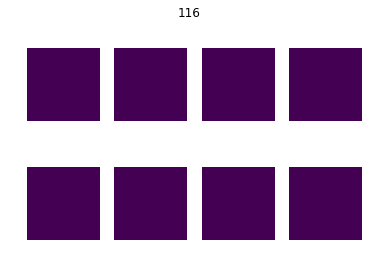

In [62]:
print('Number of overlaps:', len(overlap_test_train.keys()))
display_overlap(overlap_test_train, test_dataset[:200], train_dataset)

### Comparison using hash and numpy.where

In [86]:
def extract_overlap_hash_where(dataset_1, dataset_2):
    dataset_hash_1 = np.array([hashlib.sha256(img).hexdigest() for img in dataset_1])
    dataset_hash_2 = np.array([hashlib.sha256(img).hexdigest() for img in dataset_2])
    overlap = {}
    for i, hash_1 in enumerate(dataset_hash_1):
        duplicates = np.where(dataset_hash_2 == hash_1)
        if len(duplicates[0]):
            overlap[i] = duplicates[0]
    return overlap
%time overlap_test_train = extract_overlap_hash_where(test_dataset[:200], train_dataset)

CPU times: user 2.95 s, sys: 24 ms, total: 2.98 s
Wall time: 2.97 s


Number of overlaps: 24


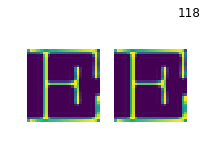

In [87]:
print('Number of overlaps:', len(overlap_test_train.keys()))
display_overlap(overlap_test_train, test_dataset[:200], train_dataset)

### Sanetize the dataset

In [88]:
def sanetize(dataset_1, dataset_2, labels_1):
    dataset_hash_1 = np.array([hashlib.sha256(img).hexdigest() for img in dataset_1])
    dataset_hash_2 = np.array([hashlib.sha256(img).hexdigest() for img in dataset_2])
    overlap = []
    for i, hash_1 in enumerate(dataset_hash_1):
        duplicates = np.where(dataset_hash_2 == hash_1)
        if len(duplicates[0]):
            overlap.append(i)
    return np.delete(dataset_1, overlap, 0), np.delete(labels_1, overlap, None)

In [91]:
%time test_dataset_sanit, test_labels_sanit = sanetize(test_dataset[:200], train_dataset, test_labels[:200])
print('Overlapping images removed:', len(test_dataset[:200]) - len(test_dataset_sanit))

CPU times: user 3.06 s, sys: 36 ms, total: 3.09 s
Wall time: 3.09 s
Overlapping images removed: 24


In [92]:
%time test_dataset_sanit, test_labels_sanit = sanetize(test_dataset, train_dataset, test_labels)
print('Overlapping images removed:', len(test_dataset) - len(test_dataset_sanit))

CPU times: user 45.4 s, sys: 52 ms, total: 45.5 s
Wall time: 45.4 s
Overlapping images removed: 1301


In [93]:
%time valid_dataset_sanit, valid_labels_sanit = sanetize(valid_dataset, train_dataset, valid_labels)
print('Overlapping images removed:', len(valid_dataset) - len(valid_dataset_sanit))

CPU times: user 44.9 s, sys: 56 ms, total: 45 s
Wall time: 44.9 s
Overlapping images removed: 1110


In [94]:
pickle_file_sanit = 'notMNIST_sanit.pickle'
try:
    f = open(pickle_file_sanit, 'wb')
    save = {
        'train_dataset': train_dataset,
        'train_labels': train_labels,
        'valid_dataset': valid_dataset_sanit,
        'valid_labels': valid_labels_sanit,
        'test_dataset': test_dataset_sanit, 
        'test_labels': test_labels_sanit,
    }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('Unable to save data to', pickle_file_sanit, ':', e)
    raise

In [95]:
statinfo = os.stat(pickle_file_sanit)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 683229963


## Problem 6

In [102]:
pretty_labels = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J'}
def display_sample_dataset(dataset, labels):
    items = random.sample(range(len(labels)), 8)
    for i, item in enumerate(items):
        plt.subplot(2, 4, i+1)
        plt.axis('off')
        plt.title(pretty_labels[labels[item]])
        plt.imshow(dataset[item])
    plt.show()

In [96]:
clf = LogisticRegression()
X_test = test_dataset.reshape(test_dataset.shape[0], 28*28)
Y_test = test_labels

In [97]:
sample_size = 50
X_train = train_dataset[:sample_size].reshape(sample_size, 28*28)
Y_train = train_labels[:sample_size]
%time clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

CPU times: user 80 ms, sys: 4 ms, total: 84 ms
Wall time: 79.4 ms


0.55400000000000005

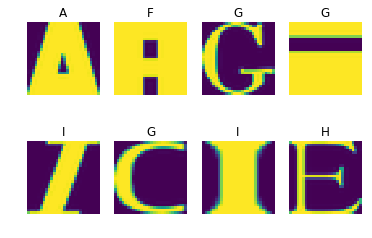

In [103]:
pred_labels = clf.predict(X_test)
display_sample_dataset(test_dataset, pred_labels)

In [106]:
sample_size = 100
X_train = train_dataset[:sample_size].reshape(sample_size, 28*28)
Y_train = train_labels[:sample_size]
%time clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

CPU times: user 172 ms, sys: 0 ns, total: 172 ms
Wall time: 172 ms


0.68779999999999997

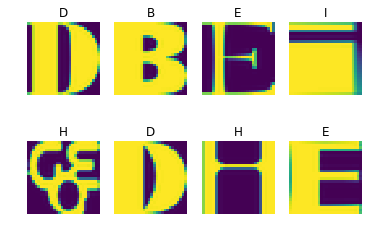

In [107]:
pred_labels = clf.predict(X_test)
display_sample_dataset(test_dataset, pred_labels)

In [109]:
sample_size = 1000
X_train = train_dataset[:sample_size].reshape(sample_size, 28*28)
Y_train = train_labels[:sample_size]
%time clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

CPU times: user 1.92 s, sys: 4 ms, total: 1.92 s
Wall time: 1.92 s


0.83099999999999996

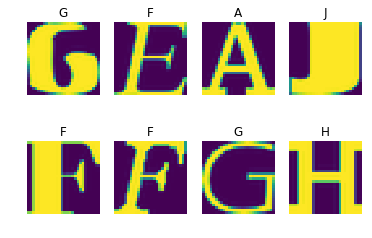

In [110]:
pred_labels = clf.predict(X_test)
display_sample_dataset(test_dataset, pred_labels)

In [111]:
sample_size = 5000
X_train = train_dataset[:sample_size].reshape(sample_size, 28*28)
Y_train = train_labels[:sample_size]
%time clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

CPU times: user 21.2 s, sys: 36 ms, total: 21.2 s
Wall time: 21.2 s


0.84999999999999998

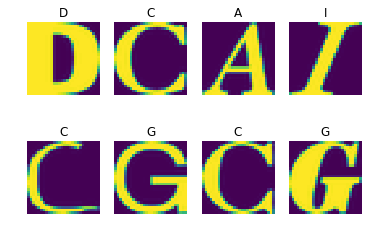

In [112]:
pred_labels = clf.predict(X_test)
display_sample_dataset(test_dataset, pred_labels)

In [113]:
sample_size = 50000
X_train = train_dataset[:sample_size].reshape(sample_size, 28*28)
Y_train = train_labels[:sample_size]
%time clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

CPU times: user 6min 4s, sys: 360 ms, total: 6min 5s
Wall time: 6min 4s


0.88380000000000003

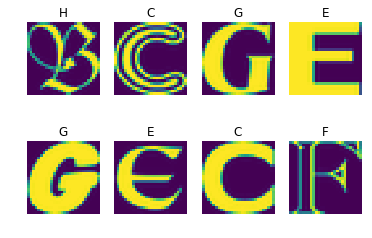

In [114]:
pred_labels = clf.predict(X_test)
display_sample_dataset(test_dataset, pred_labels)